In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Download the dataset 
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad 1,10000.0,0.1703,0.375915,0.0,0.0,0.0,0.0,1.0
Ad 2,10000.0,0.1295,0.335769,0.0,0.0,0.0,0.0,1.0
Ad 3,10000.0,0.0728,0.259821,0.0,0.0,0.0,0.0,1.0
Ad 4,10000.0,0.1196,0.324509,0.0,0.0,0.0,0.0,1.0
Ad 5,10000.0,0.2695,0.443722,0.0,0.0,0.0,1.0,1.0
Ad 6,10000.0,0.0126,0.111546,0.0,0.0,0.0,0.0,1.0
Ad 7,10000.0,0.1112,0.314395,0.0,0.0,0.0,0.0,1.0
Ad 8,10000.0,0.2091,0.406686,0.0,0.0,0.0,0.0,1.0
Ad 9,10000.0,0.0952,0.293506,0.0,0.0,0.0,0.0,1.0
Ad 10,10000.0,0.0489,0.215670,0.0,0.0,0.0,0.0,1.0


In [5]:
# Implementing UCB (Upper confidence bound)
import math
N = 10000
d = 10

ads_selected = []
number_of_selection = [0] * N
sums_of_rewards = [0] * d
total_rewards = 0
for n in range(0, N):
    ad = 0 
    max_upperbound = 0
    for i in range(0, d):
        if(number_of_selection [i]> 0 ):
            average_reward = sums_of_rewards[i] / number_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound  > max_upperbound :
            max_upperbound = upper_bound
            ad = i 
    ads_selected.append(ad)
    number_of_selection[ad] = number_of_selection[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward 

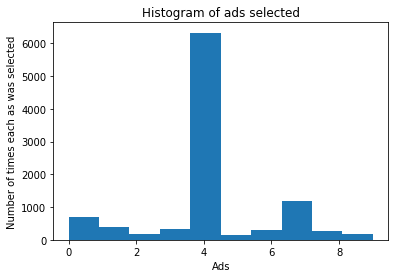

In [6]:
# Visualising the result
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each as was selected')
plt.show() 